Import necessary packages and output their version numbers:

In [15]:
import numpy as np 
import psycopg2 as pg
import pandas as pd
import scipy as scpy
import sys
import matplotlib.pyplot as plt
import sklearn as skl
#import mord as mrd
#print("mord - ",mrd.__version__)
from mord import LogisticIT

## Monthly bank balance

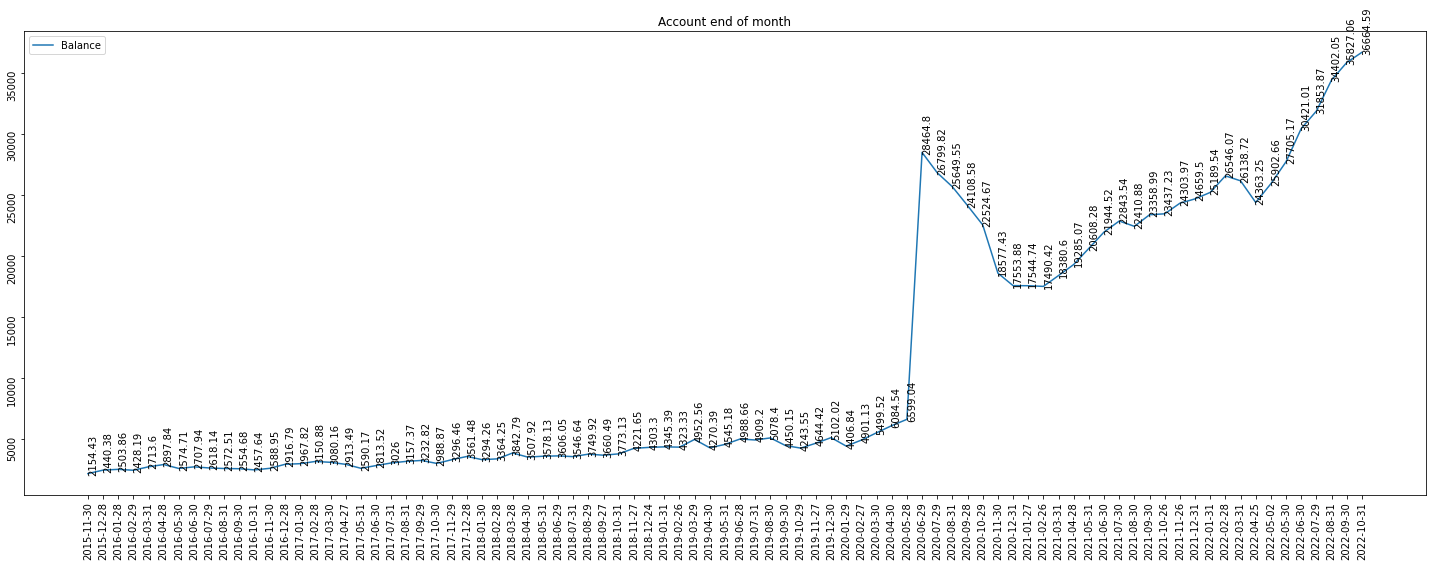

In [16]:
try:

    connection = pg.connect(  user="postgres",
                                    password="vdis/phdl",
                                    host="127.0.0.1",
                                    port="5432",
                                    database="postgres" )

    cursor = connection.cursor()

    db_table_query = '''    select 
	                            TO_CHAR(booking_date, 'YYYY-MM-DD') as booking_date,
	                            after_transaction
                            from python_tech_task 
                            where action like 'Account end' 
                            order by TO_CHAR(booking_date, 'YYYY-MM-DD')    '''

    # Execute a command: this creates a new table
    cursor.execute(db_table_query)
    db_records = cursor.fetchall()

except Exception:
    print("Error while connecting to PostgreSQL")

df = pd.DataFrame(db_records)
df.columns = [  "booking_date", "after_transaction"  ]

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, 1)
axis.plot(	df['booking_date'], df['after_transaction'], label="Balance"	)

for a,b in zip(df['booking_date'], df['after_transaction']): 
    plt.text(a, b, str(b), rotation=90)

axis.set_title("Account end of month")
axis.legend(loc="upper left")
axis.tick_params(labelrotation=90)
plt.show()

## Weekly ATM withdrawals

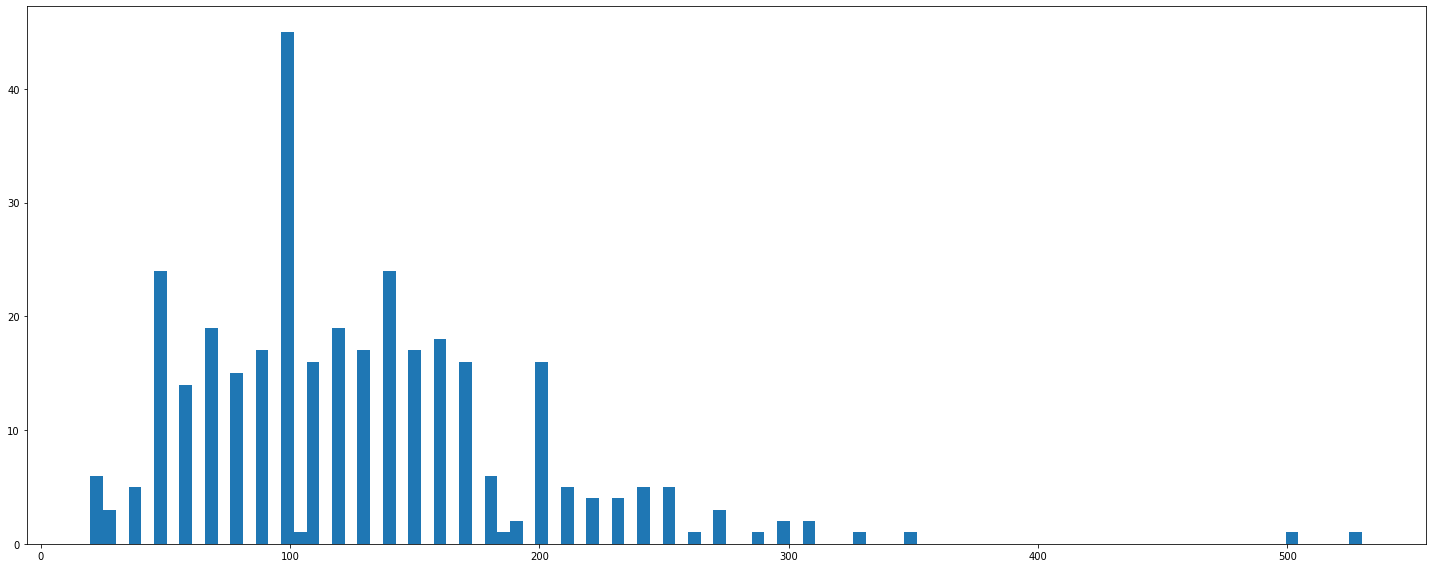

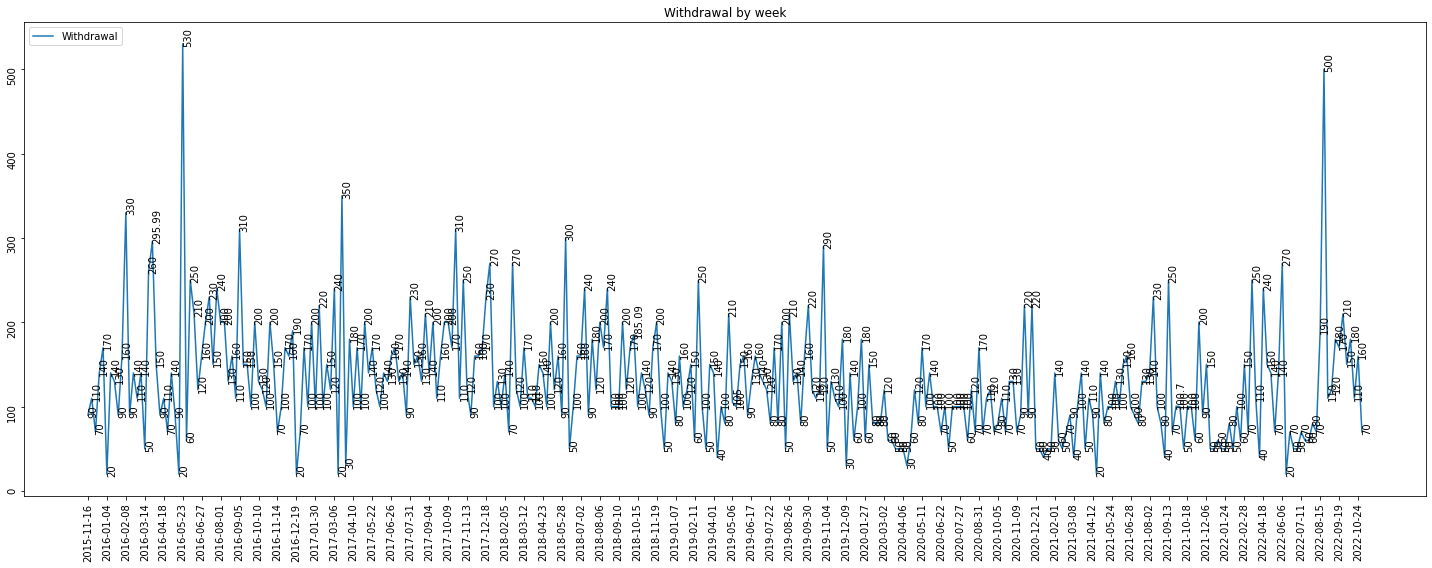

In [17]:
try:

    db_table_query = '''    select 
	                            TO_CHAR(date_trunc('week', booking_date::date), 'YYYY-MM-DD') AS booking_date,
	                            sum(withdrawal) as withdrawal
                            from python_tech_task 
                            where action like 'ATM withdrawal' 
                            group by TO_CHAR(date_trunc('week', booking_date::date), 'YYYY-MM-DD') 
                            order by TO_CHAR(date_trunc('week', booking_date::date), 'YYYY-MM-DD')    '''

    # Execute a command: this creates a new table
    cursor.execute(db_table_query)
    db_records = cursor.fetchall()

except Exception:
    print("Error while connecting to PostgreSQL")

df = pd.DataFrame(db_records)
df.columns = [  "booking_date", "withdrawal"  ]

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, 1)
axis.hist(	df['withdrawal'], bins=100   )
plt.show()

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, 1)
axis.plot(	df['booking_date'], df['withdrawal'], label="Withdrawal"	)

for a,b in zip(df['booking_date'], df['withdrawal']): 
    plt.text(a, b, str(b), rotation=90)

axis.set_title("Withdrawal by week")
axis.set_xticks(axis.get_xticks()[::5])
axis.legend(loc="upper left")
axis.tick_params(labelrotation=90)
plt.show()


## Food bill

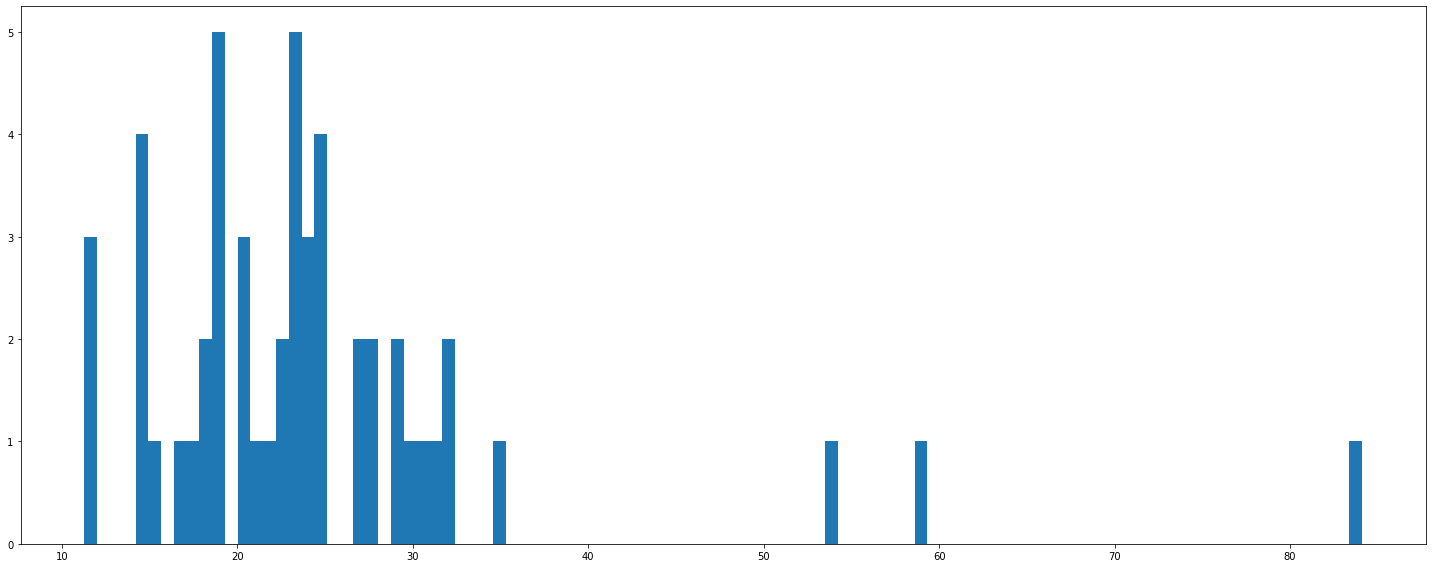

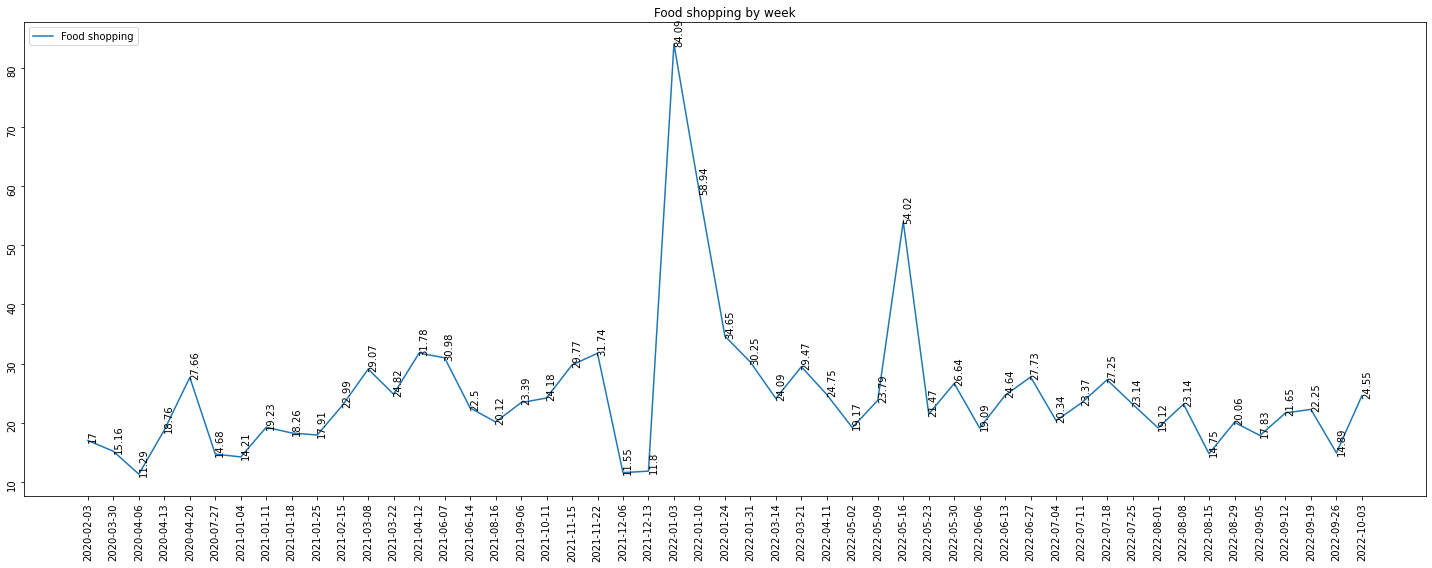

In [18]:
try:

    db_table_query = '''    select 
	                            TO_CHAR(date_trunc('week', booking_date::date), 'YYYY-MM-DD') AS booking_date,
	                            sum(withdrawal) as withdrawal
                            from python_tech_task 
                            where action like 'Edeka%' or action like 'Rewe%' 
                            group by TO_CHAR(date_trunc('week', booking_date::date), 'YYYY-MM-DD') 
                            order by TO_CHAR(date_trunc('week', booking_date::date), 'YYYY-MM-DD')    '''

    # Execute a command: this creates a new table
    cursor.execute(db_table_query)
    db_records = cursor.fetchall()

except Exception:
    print("Error while connecting to PostgreSQL")

df = pd.DataFrame(db_records)
df.columns = [  "booking_date", "withdrawal"  ]

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, 1)
axis.hist(	df['withdrawal'], bins=100   )
plt.show()

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, 1)
axis.plot(	df['booking_date'], df['withdrawal'], label="Food shopping"	)

for a,b in zip(df['booking_date'], df['withdrawal']): 
    plt.text(a, b, str(b), rotation=90)

axis.set_title("Food shopping by week")
axis.set_xticks(axis.get_xticks()[::1])
axis.legend(loc="upper left")
axis.tick_params(labelrotation=90)
plt.show()

## Monthly phone bill

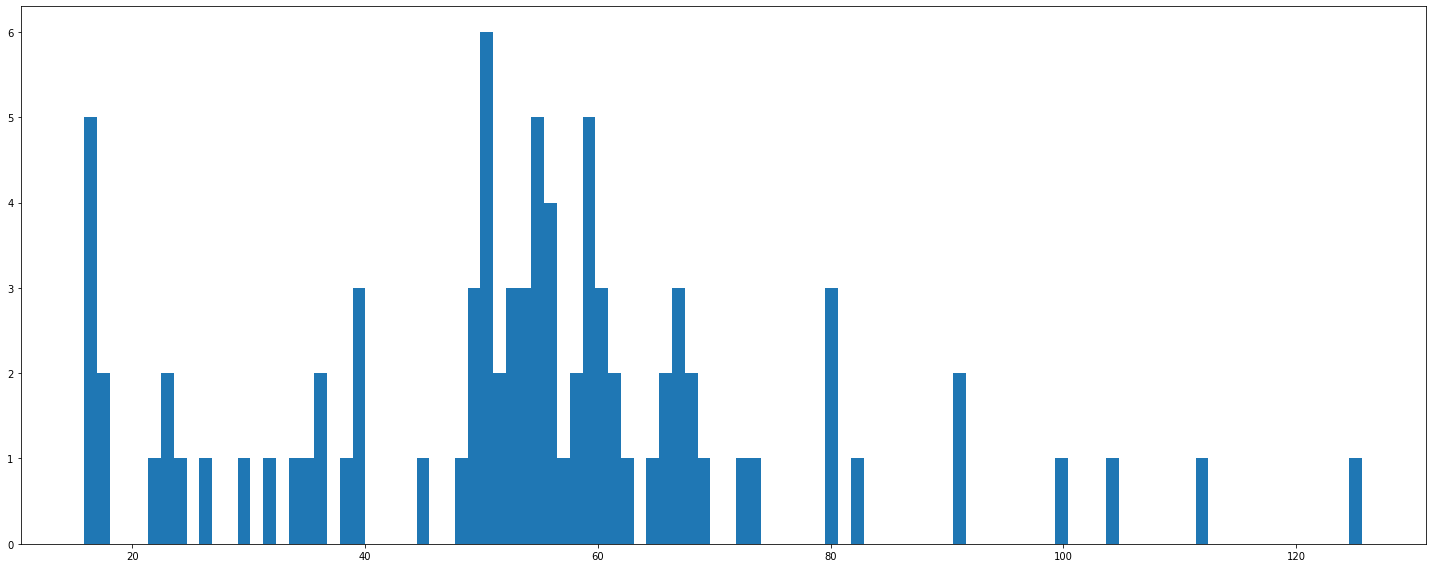

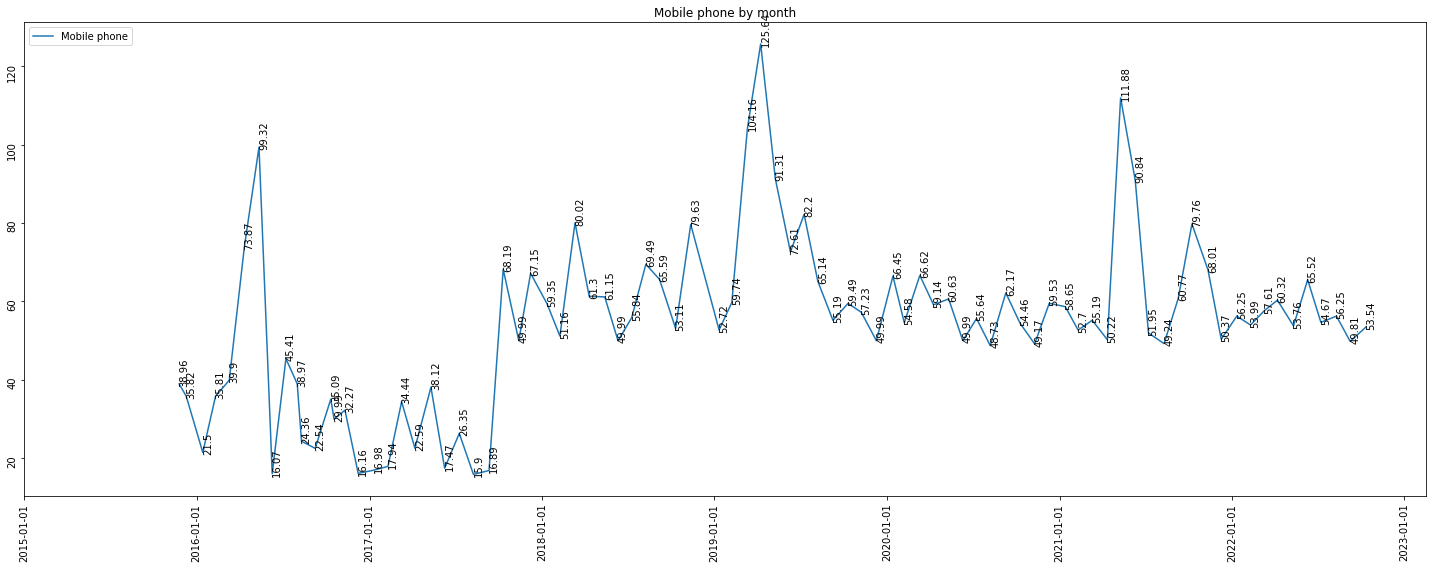

In [19]:
try:

    db_table_query = '''    select 
                                booking_date,
	                            withdrawal
                            from python_tech_task 
                            where action like 'Telefonica%' and comment not like 'Payment for DSL%'  
                            order by booking_date   '''

    # Execute a command: this creates a new table
    cursor.execute(db_table_query)
    db_records = cursor.fetchall()

except Exception:
    print("Error while connecting to PostgreSQL")

df = pd.DataFrame(db_records)
df.columns = [  "booking_date", "cost"  ]

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, 1)
axis.hist(	df['cost'], bins=100   )
plt.show()

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, 1)
axis.plot(	df['booking_date'], df['cost'], label="Mobile phone"	)

for a,b in zip(df['booking_date'], df['cost']): 
    plt.text(a, b, str(b), rotation=90)

axis.set_title("Mobile phone by month")
axis.set_xticks(axis.get_xticks()[::1])
axis.legend(loc="upper left")
axis.tick_params(labelrotation=90)
plt.show()


## Find monthly profit

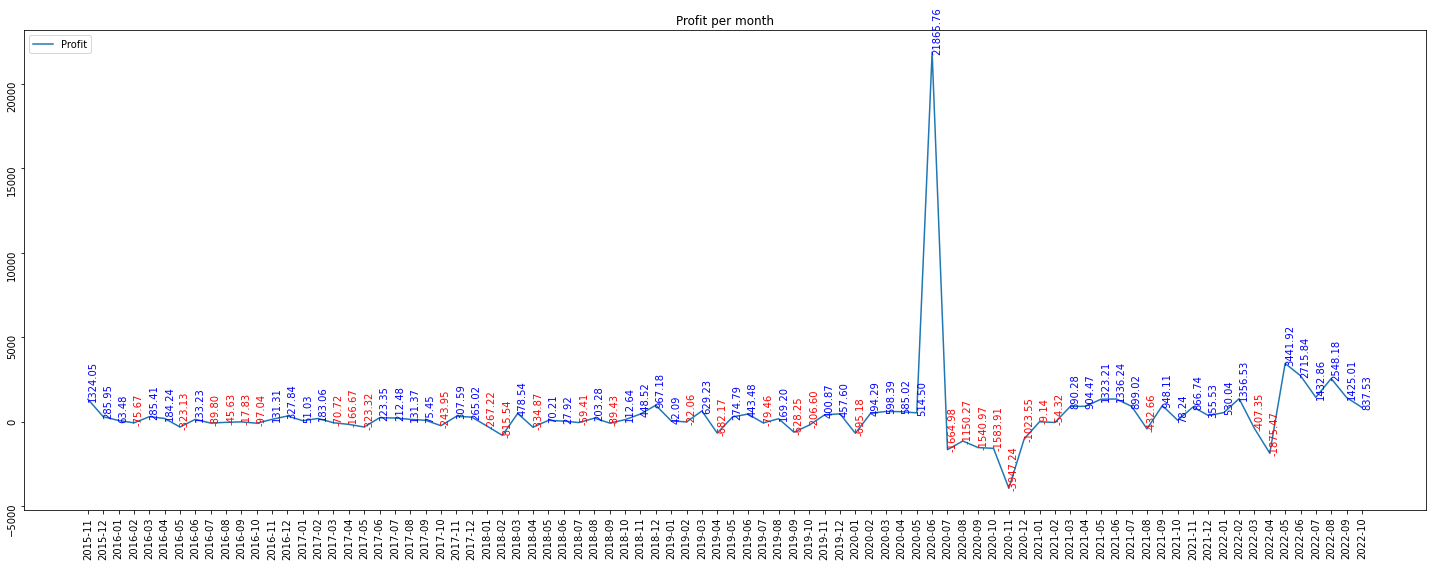

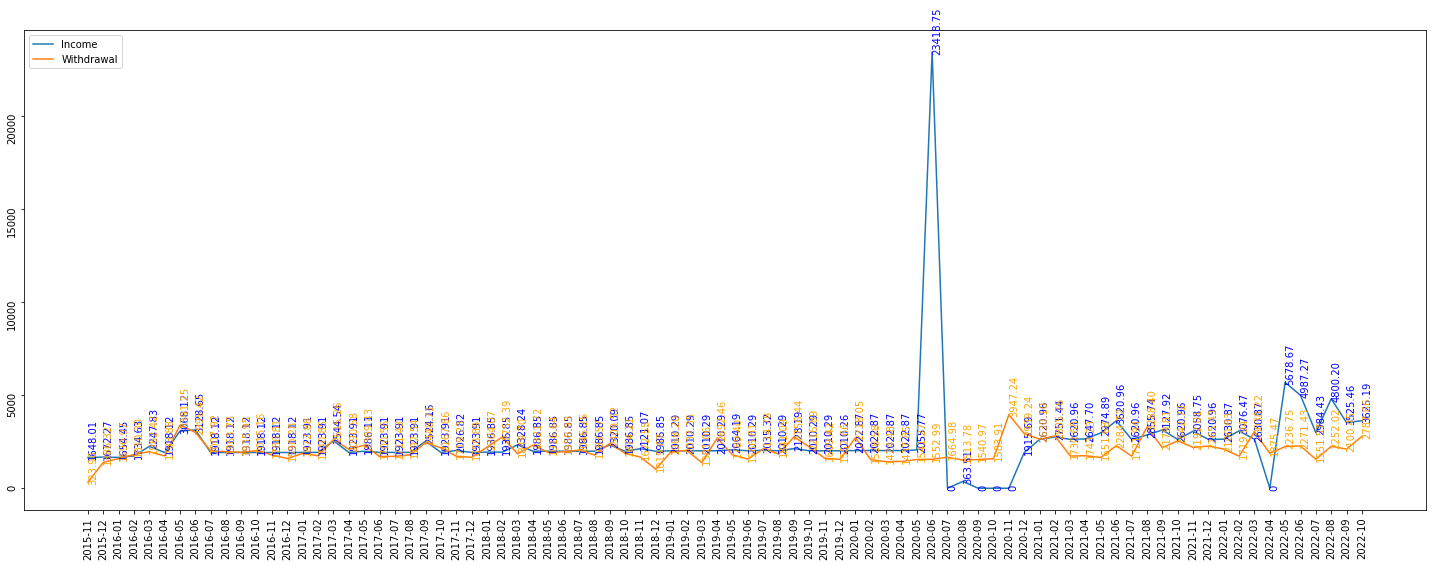

In [20]:
try:

    db_table_query = '''    select
                                TO_CHAR(date_trunc('month', aa.booking_date::date), 'YYYY-MM') AS booking_date,
                                sum(aa.deposit) as income, 
                                bb.withdrawal as withdrawal,  
								sum(aa.deposit) - bb.withdrawal as profit
                            from python_tech_task aa
                            join (
                                select 
	                                TO_CHAR(date_trunc('month', booking_date::date), 'YYYY-MM') AS booking_date,
	                                sum(withdrawal) as withdrawal
                                from python_tech_task  
                                group by TO_CHAR(date_trunc('month', booking_date::date), 'YYYY-MM') 
                                order by TO_CHAR(date_trunc('month', booking_date::date), 'YYYY-MM')
                            ) bb    
                            on TO_CHAR(date_trunc('month', aa.booking_date::date), 'YYYY-MM') = bb.booking_date   
							group by TO_CHAR(date_trunc('month', aa.booking_date::date), 'YYYY-MM'), bb.withdrawal  
                            order by TO_CHAR(date_trunc('month', aa.booking_date::date), 'YYYY-MM')  '''

    # Execute a command: this creates a new table
    cursor.execute(db_table_query)
    db_records = cursor.fetchall()

except Exception:
    print("Error while connecting to PostgreSQL")

df = pd.DataFrame(db_records)
df.columns = [  "booking_date", "income", "withdrawal", "profit"  ]

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True

figure, axis = plt.subplots(1, 1)
axis.plot(	df['booking_date'], df['profit'], label="Profit"	)

for a,b in zip(df['booking_date'], df['profit']):
    if(b > 0):
        plt.text(a, b, str(b), rotation=90, color="blue")
    else:
        plt.text(a, b, str(b), rotation=90, color="red")

axis.set_title("Profit per month")
axis.legend(loc="upper left")
axis.tick_params(labelrotation=90)
plt.show()

figure, axis = plt.subplots(1, 1)
axis.plot(	df['booking_date'], df['income'], label='Income'   )
axis.plot(	df['booking_date'], df['withdrawal'], label='Withdrawal'   )

for a,b in zip(df['booking_date'], df['income']): 
    plt.text(a, b, str(b), rotation=90, color="blue")
for a,b in zip(df['booking_date'], df['withdrawal']): 
    plt.text(a, b, str(b), rotation=90, color="orange")

axis.legend(loc="upper left")
axis.tick_params(labelrotation=90)
plt.show()

cursor.close()
connection.close()

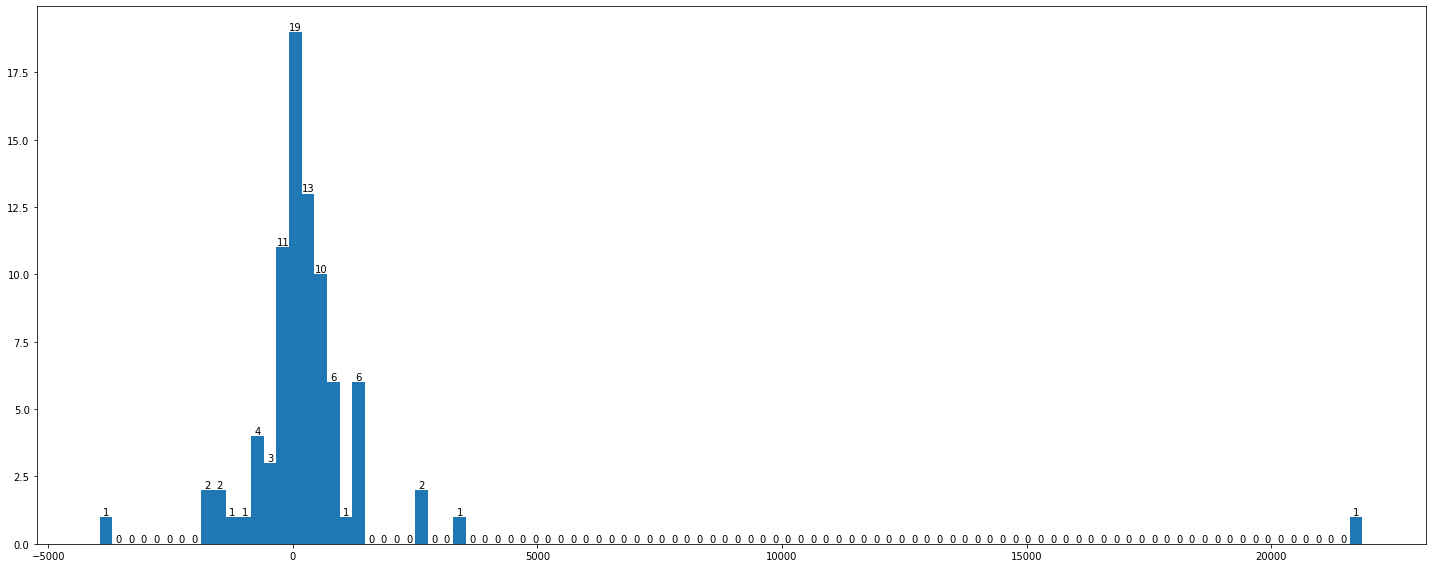

In [21]:
figure, axis = plt.subplots(1, 1)
counts, edges, bars = axis.hist(	df['profit'], bins=100   )
plt.bar_label(bars)
plt.show()